In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = r"D:\Malathi\SEM_6\IVP\Tamil.jpg"

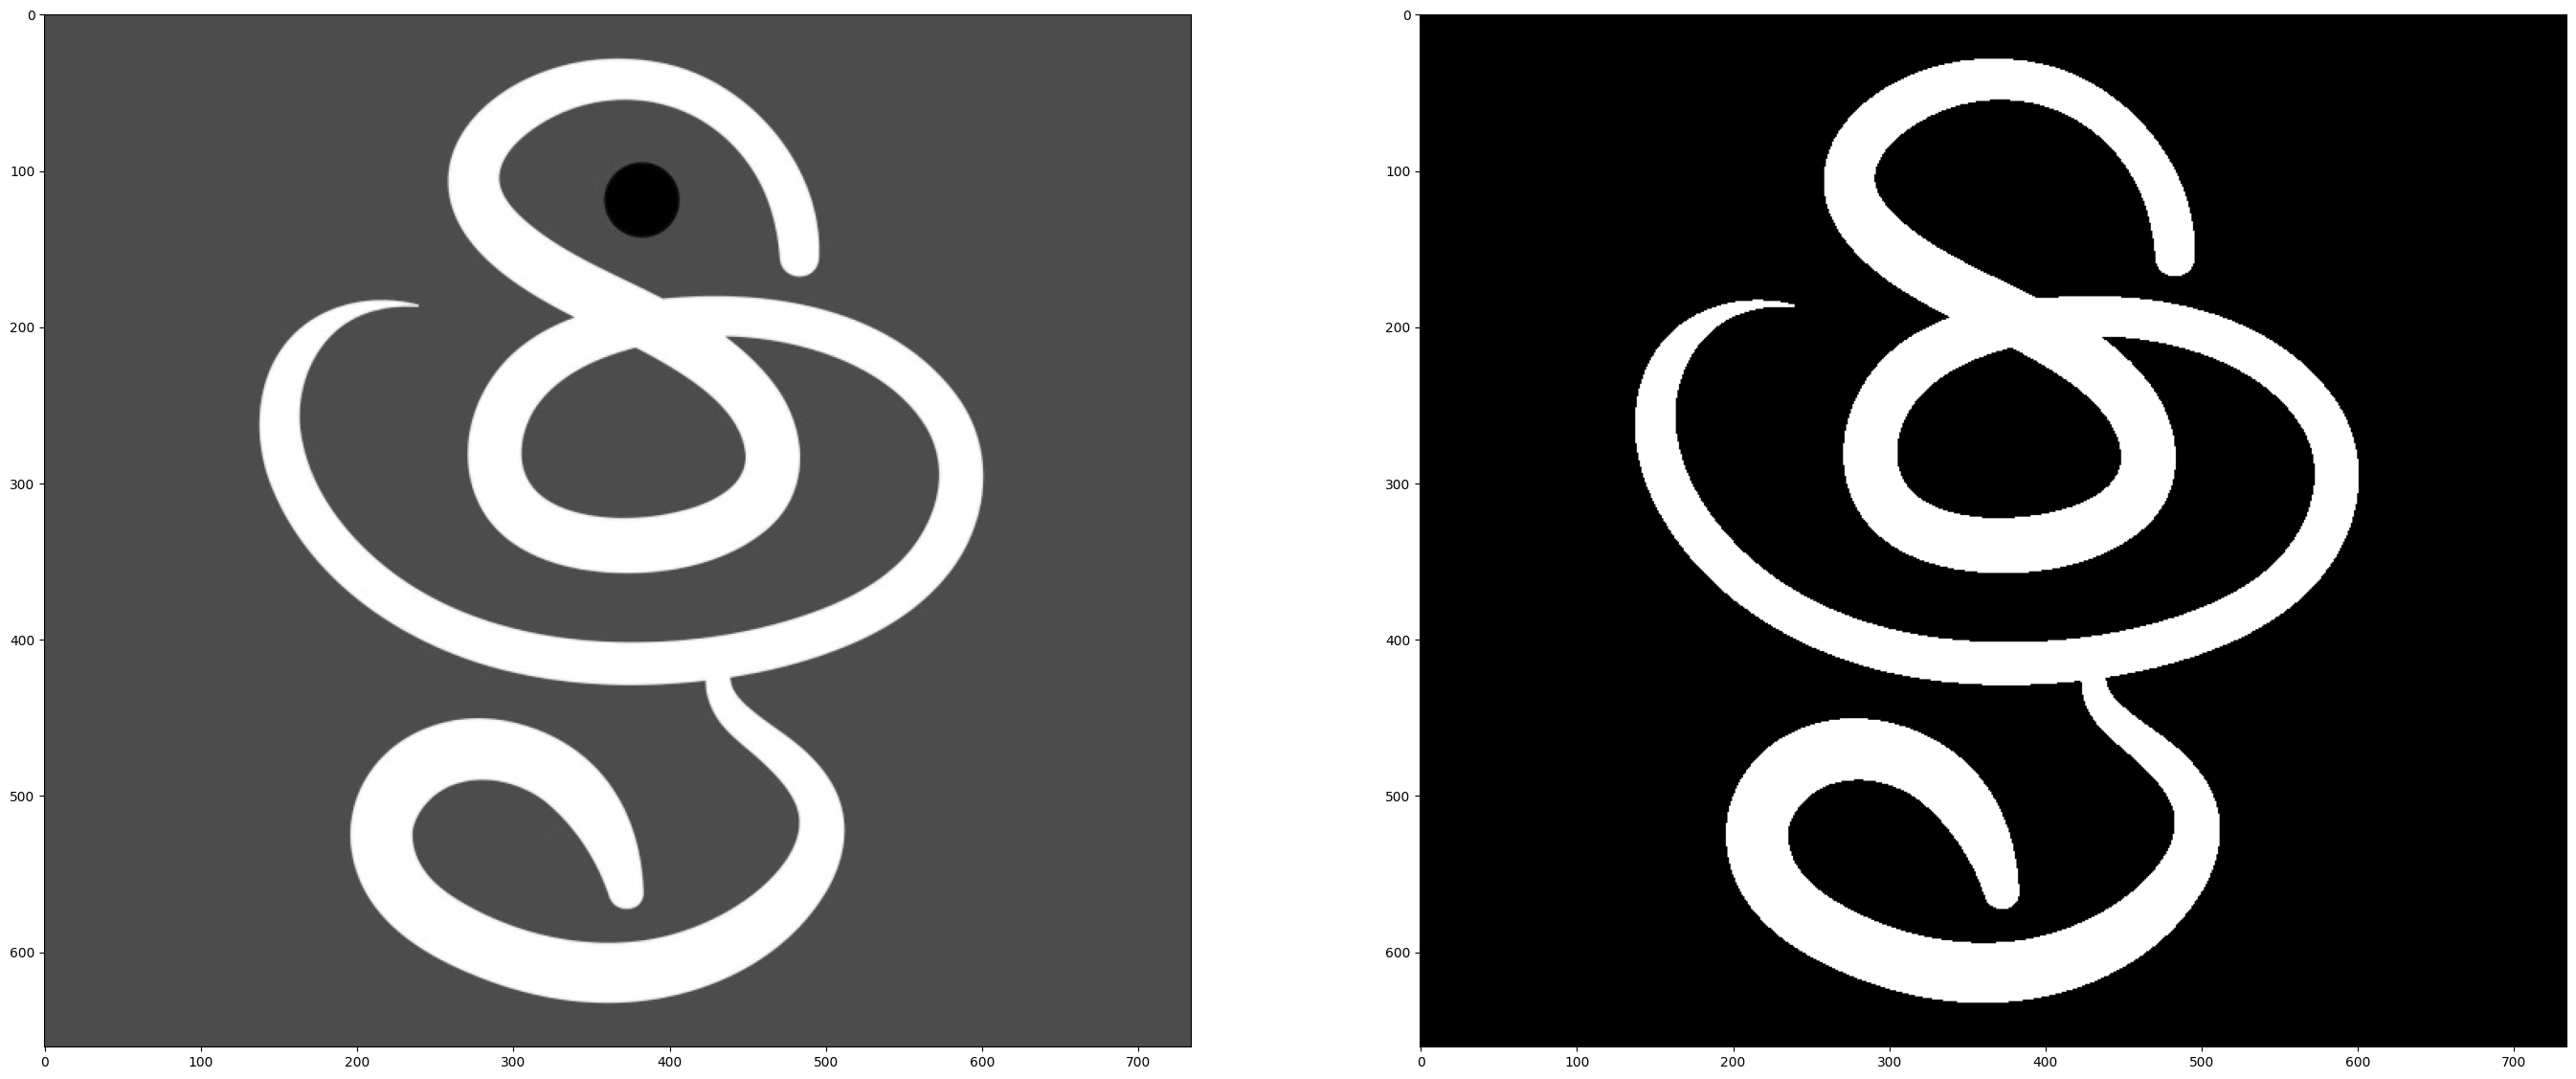

In [8]:
def segment_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    
    # Find the threshold using Otsu's method
    _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    plt.figure(figsize=(34, 24))
    plt.subplot(1,2, 1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2, 2)
    plt.imshow(thresholded_image, cmap='gray')

segment_image(image_path)


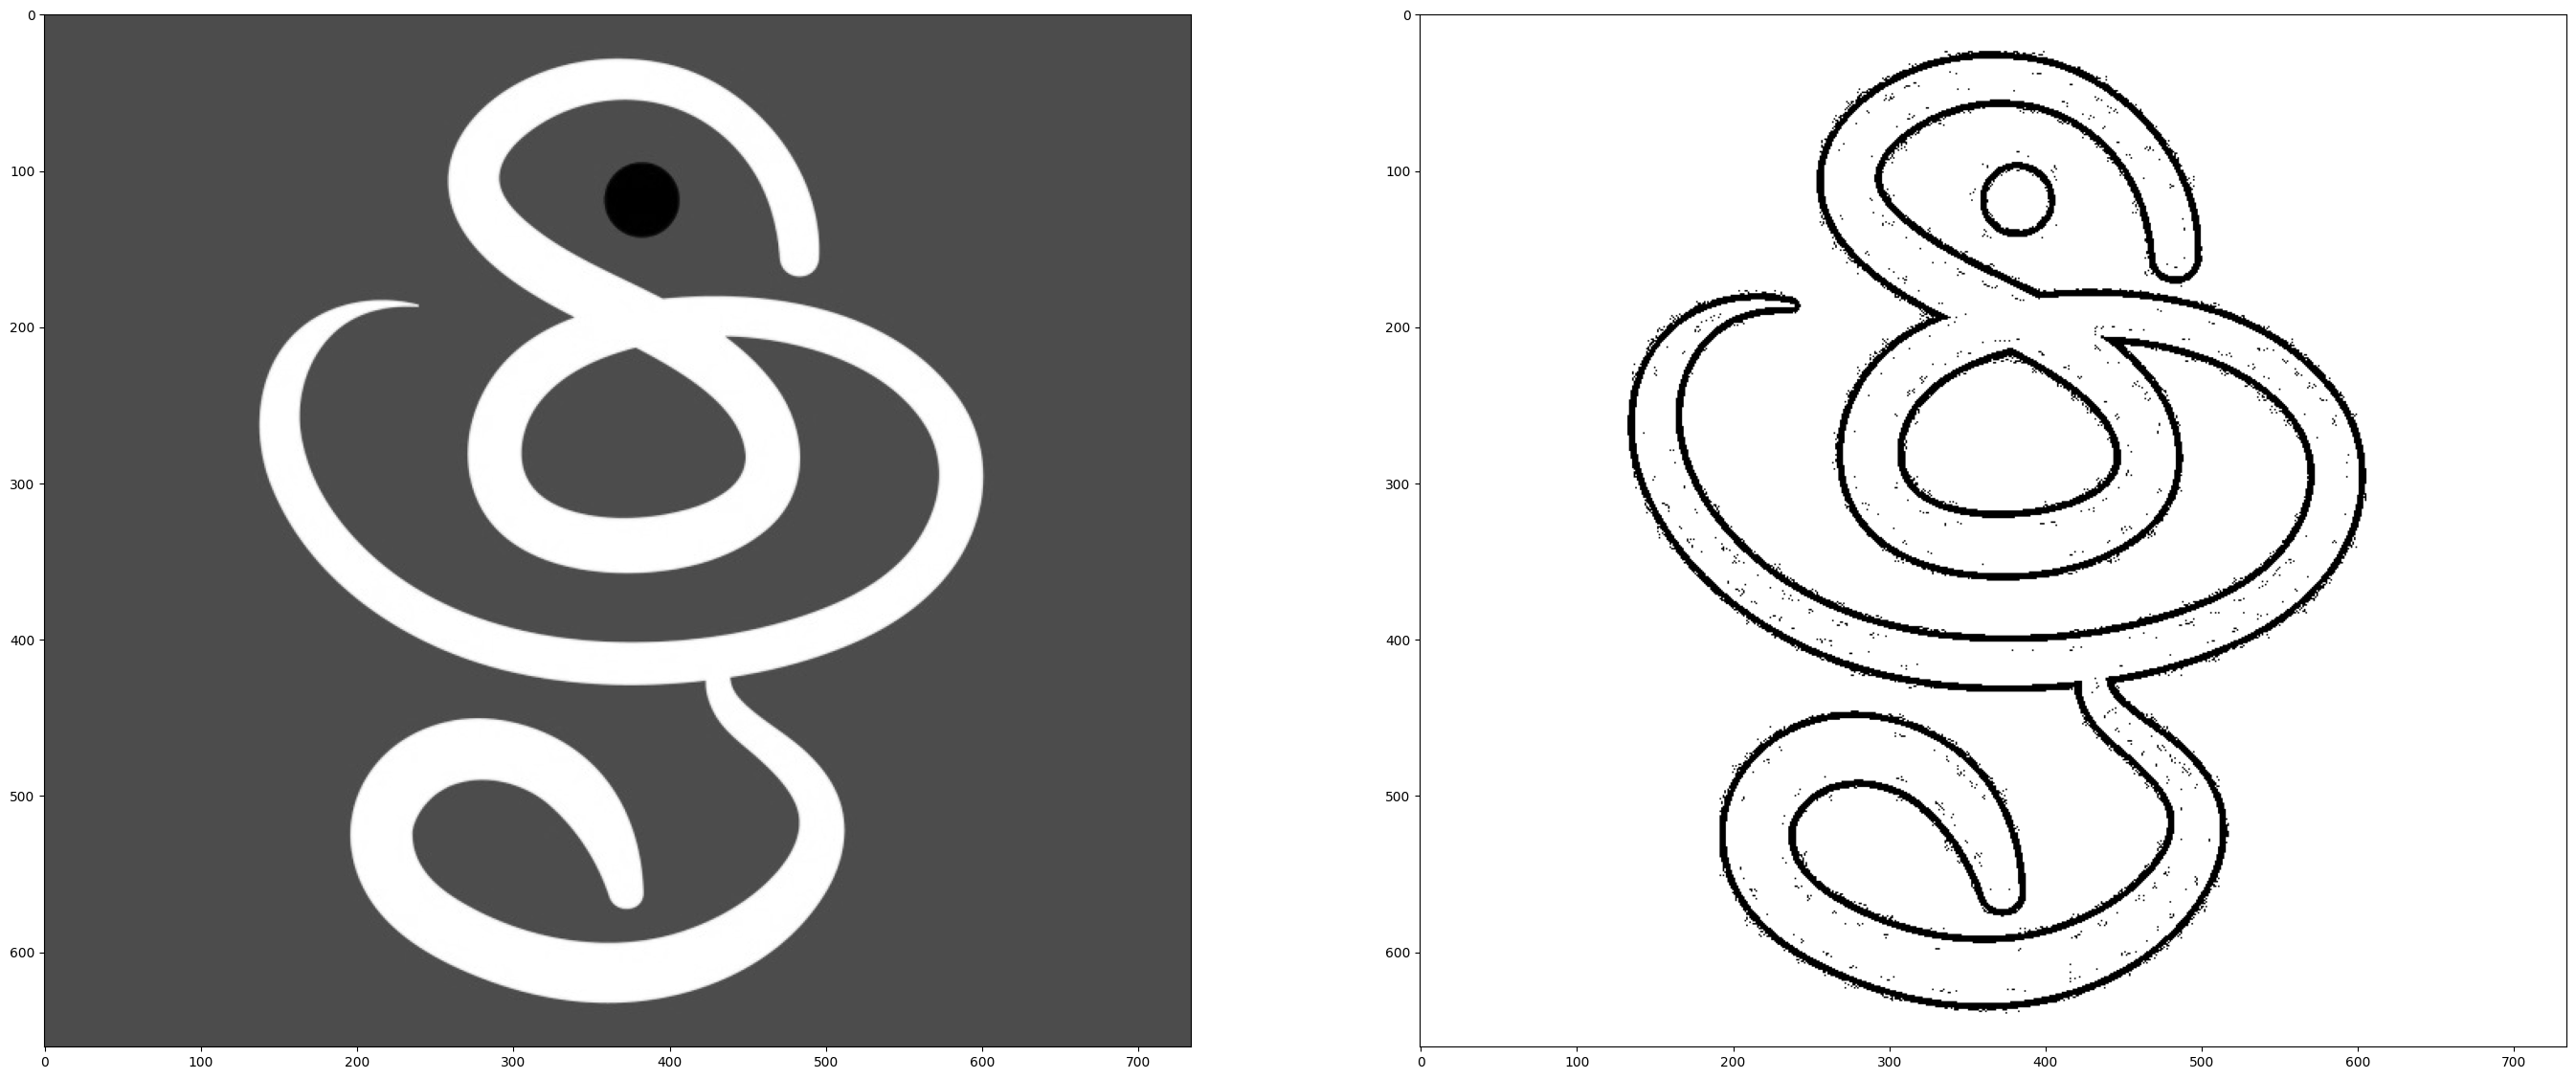

In [9]:
def segment_image_adaptive(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply adaptive thresholding
    thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)
    
    plt.figure(figsize=(34, 24))
    plt.subplot(1,2, 1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2, 2)
    plt.imshow(thresholded_image, cmap='gray')
    
segment_image_adaptive(image_path)

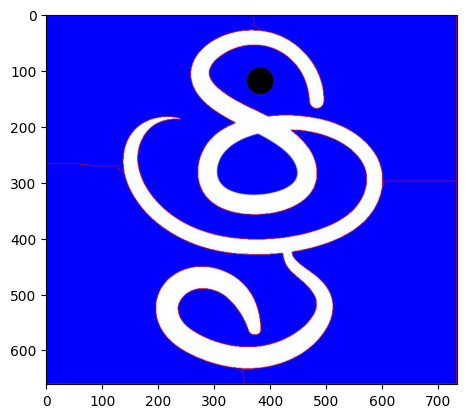

In [15]:
import cv2
import numpy as np

def segment_image_watershed(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to obtain binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Perform morphological operations to remove noise
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    
    # Mark unknown region with 0
    markers[unknown == 255] = 0
    
    # Apply watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in red
    
    # Display segmented image
    plt.imshow(image)


segment_image_watershed(image_path)


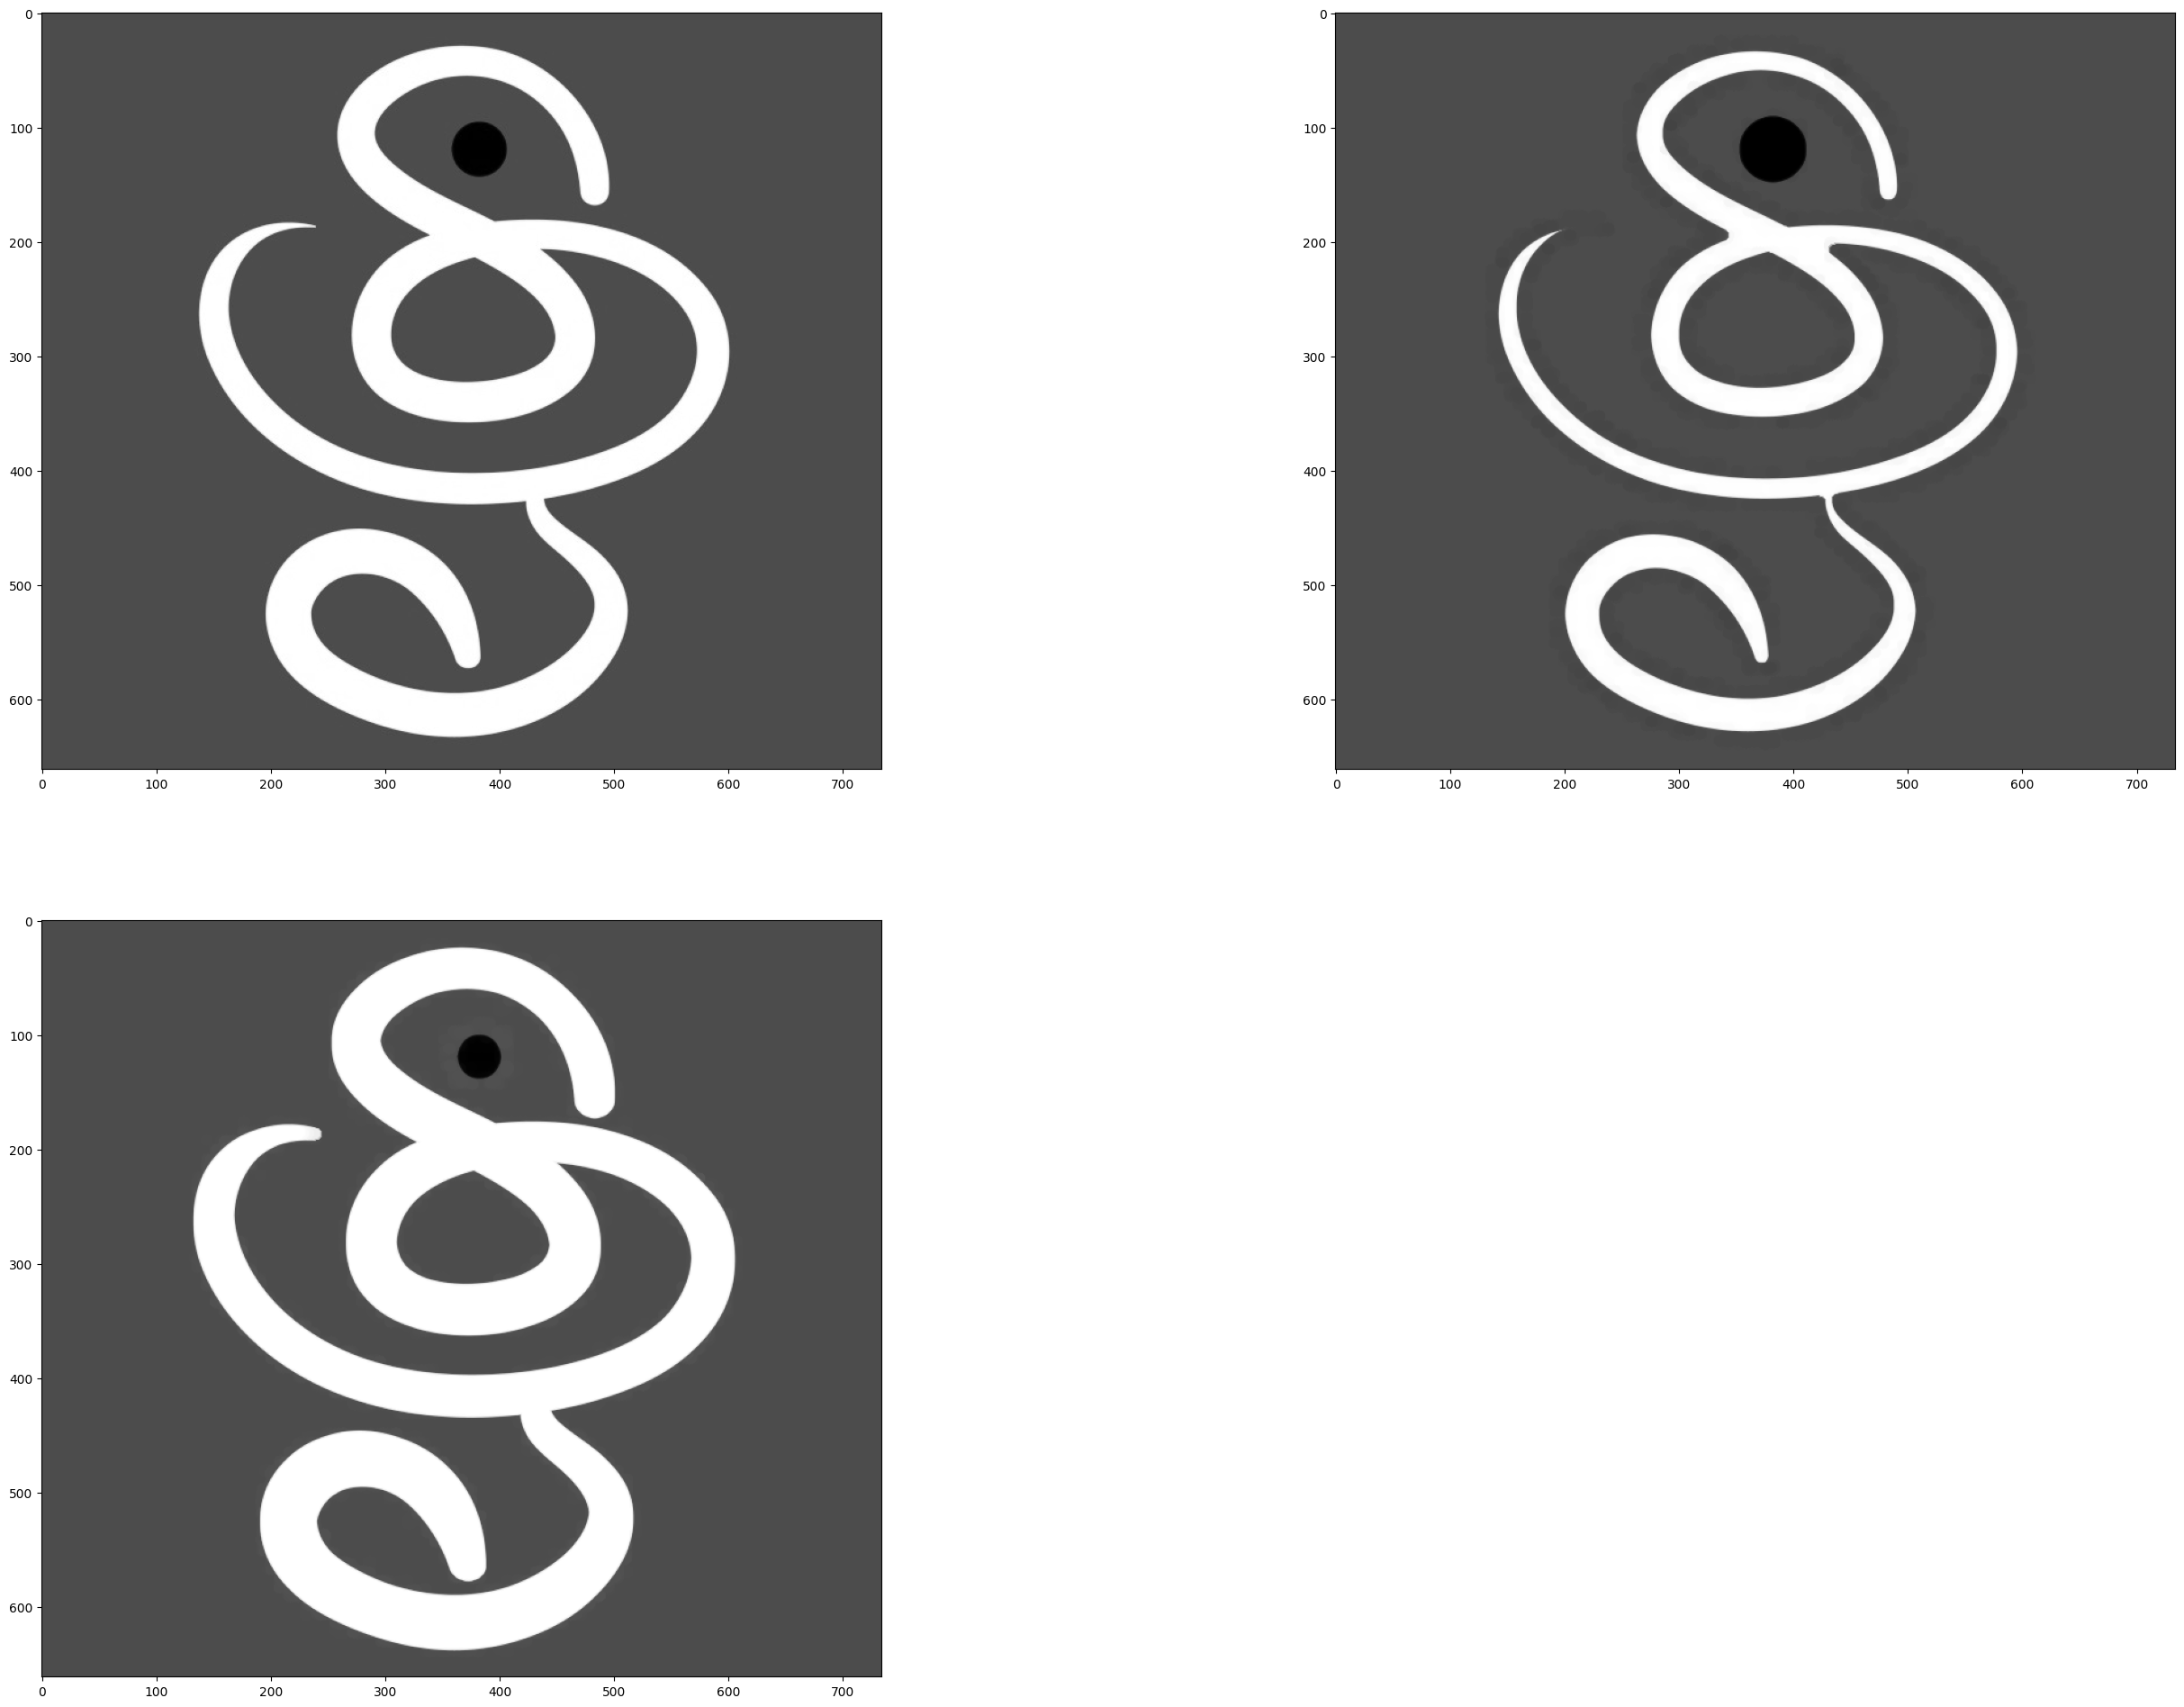

In [20]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the circular structuring element
kernel_size = 11
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Perform erosion
erosion = cv2.erode(image, kernel, iterations=1)

# Perform dilation
dilation = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(34, 24))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2,2, 2)
plt.imshow(erosion, cmap='gray')
plt.subplot(2,2, 3)
plt.imshow(dilation, cmap='gray')



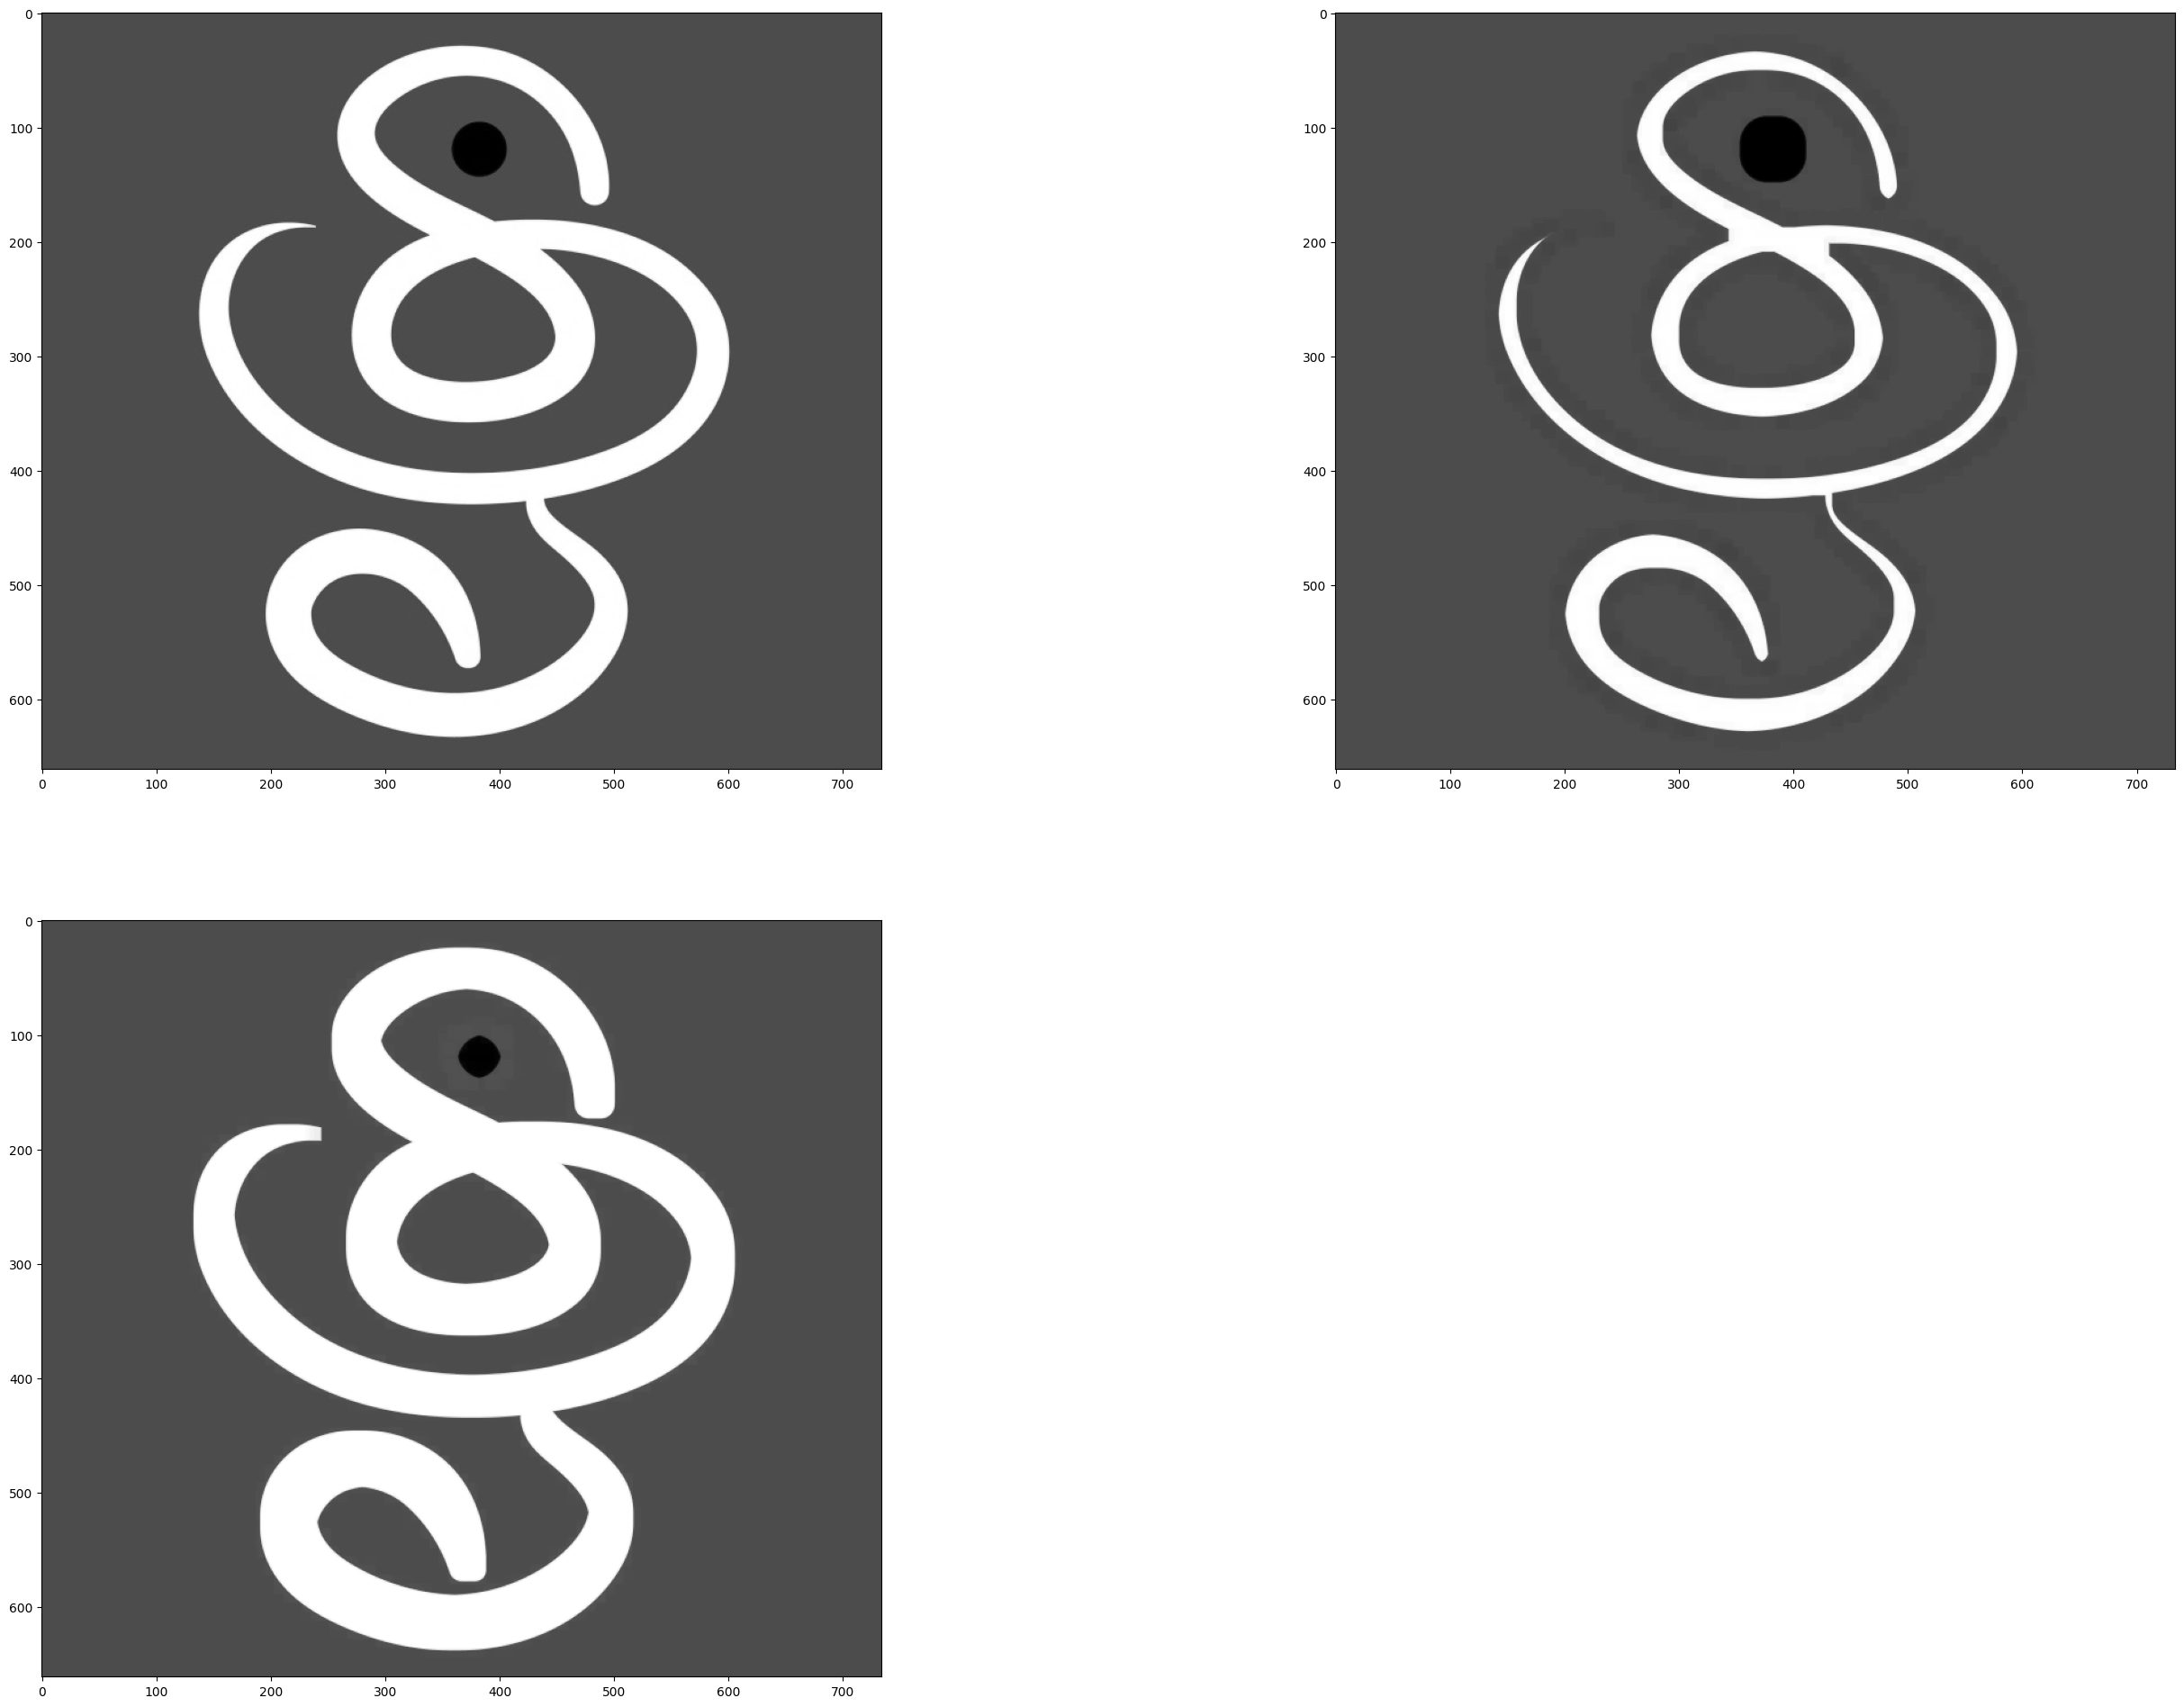

In [24]:
# Define the square structuring element
kernel_size = 11
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform erosion
erosion2 = cv2.erode(image, kernel, iterations=1)

# Perform dilation
dilation2 = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(34, 24))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2,2, 2)
plt.imshow(erosion2, cmap='gray')
plt.subplot(2,2, 3)
plt.imshow(dilation2, cmap='gray')

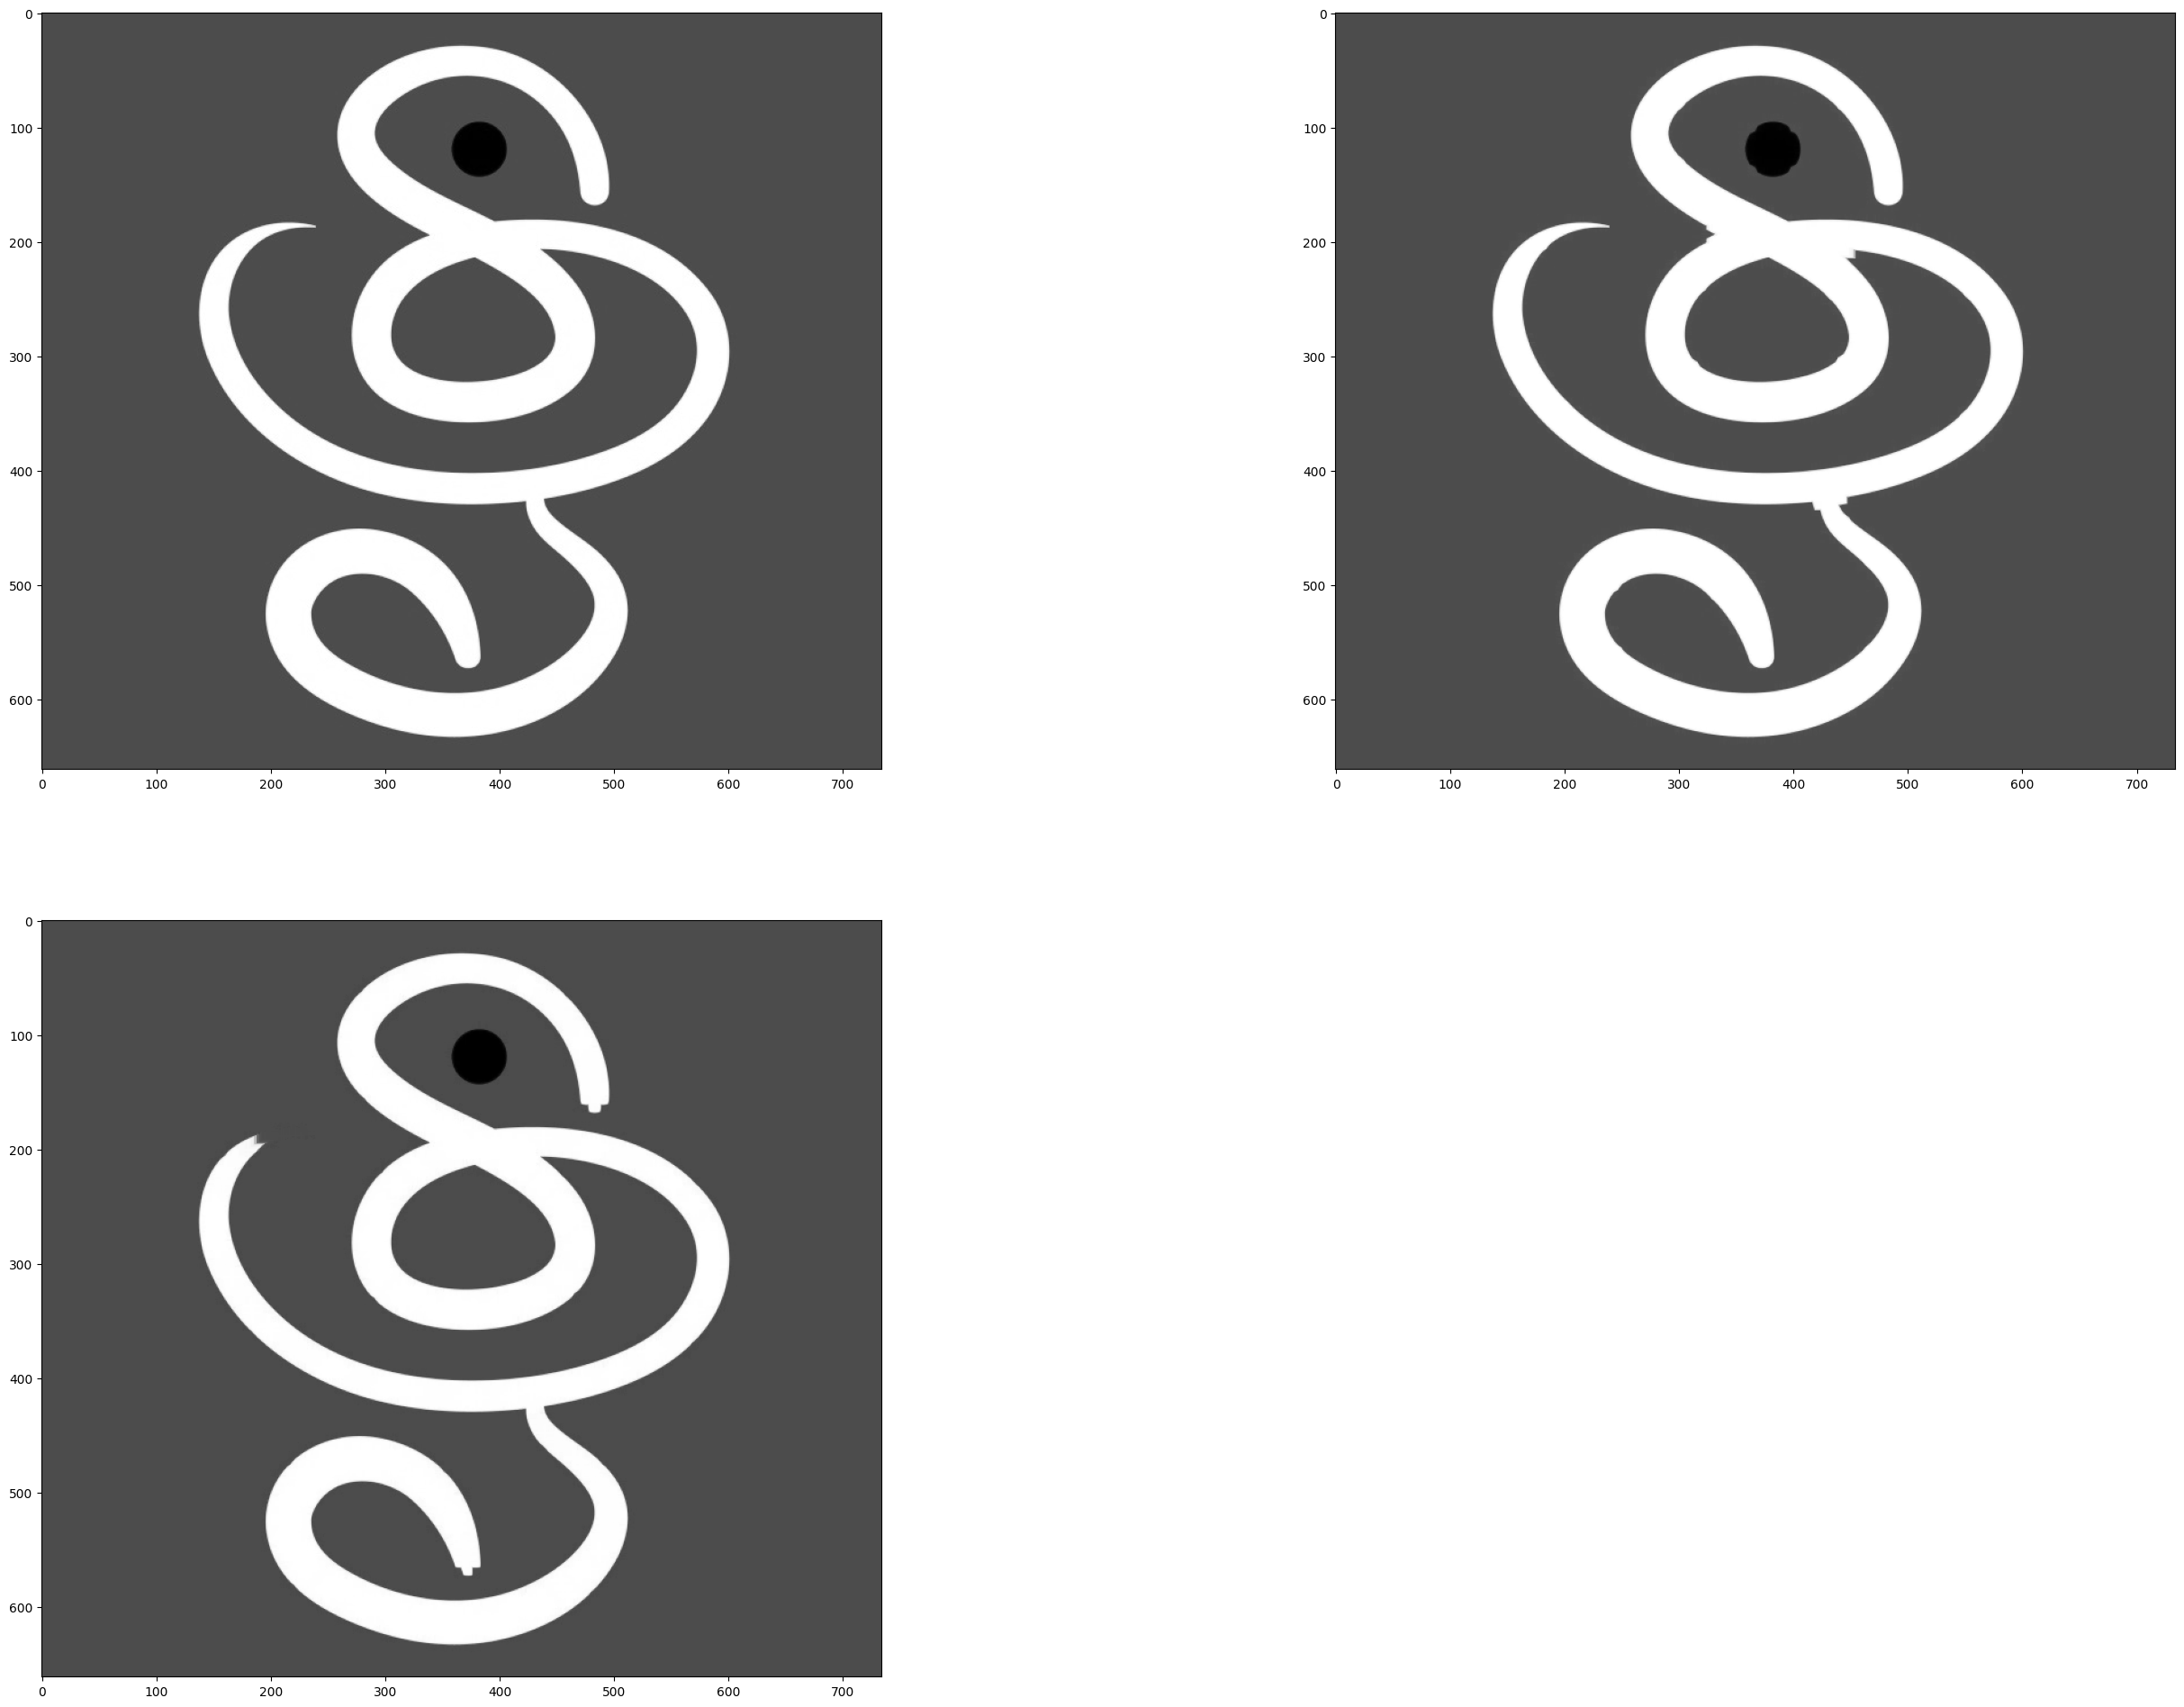

In [26]:
# Define the cross-shaped structuring element (kernel)
kernel_size = 15
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))

# Perform closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Perform opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(34, 24))
plt.subplot(2,2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2,2, 2)
plt.imshow(closing, cmap='gray')
plt.subplot(2,2, 3)
plt.imshow(opening, cmap='gray')